In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

import scikitplot as skplt

In [2]:
iris = load_iris()

In [3]:
## Extracting the data from the iris dataset, and creating a DataFrame
## with the correct column names

dat= iris.data 
target= iris.target 
names= iris.target_names

irisDF = pd.DataFrame(dat, columns=iris.feature_names)
irisDF['species'] = iris.target
irisDF['species'] = irisDF['species'].replace(to_replace= [0, 1, 2], value = ['setosa', 'versicolor', 'virginica'])

In [4]:
irisDF.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
## Defining X (inputs/features) and Y (output/species)

X = irisDF.iloc[:, :-1].values
Y = irisDF.iloc[:, 4].values

In [6]:
## K nearest neighbor classification

scaler = StandardScaler()
scaler.fit(X)

X= scaler.transform(X)

classifier = KNeighborsClassifier()
classifier.fit(X, Y) 

# Predict y data with classifier: 
Y_predictK = classifier.predict(X)

# Print results: 
print(classification_report(Y, Y_predictK)) 


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       0.92      0.94      0.93        50
   virginica       0.94      0.92      0.93        50

    accuracy                           0.95       150
   macro avg       0.95      0.95      0.95       150
weighted avg       0.95      0.95      0.95       150



The results above show that the K Neighbor classifier is 95% accurate

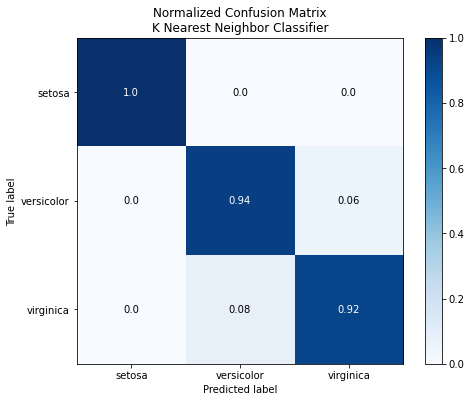

In [7]:
skplt.metrics.plot_confusion_matrix(Y, Y_predictK, normalize=True, figsize=(8,6), title= 'Normalized Confusion Matrix\nK Nearest Neighbor Classifier')
plt.show()

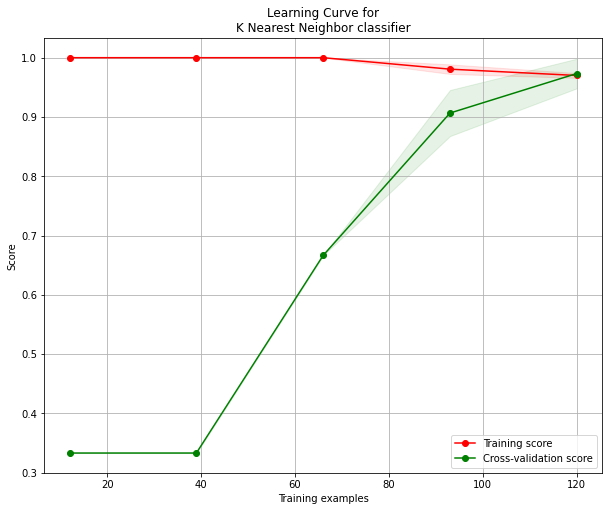

In [65]:
skplt.estimators.plot_learning_curve(classifier, X, Y, figsize=(10,8), title= 'Learning Curve for\nK Nearest Neighbor classifier')
plt.show()

In [8]:
## Support Vector Machine classification

scaler = StandardScaler()
scaler.fit(X)

X = scaler.transform(X)

classifier = SVC(gamma='auto')
classifier.fit(X, Y) 

# Predict y data with classifier: 
Y_predictSVM = classifier.predict(X)

# Print results: 
print(classification_report(Y, Y_predictSVM)) 

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       0.96      0.96      0.96        50
   virginica       0.96      0.96      0.96        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



The support vector machine (SVM) classifier is 97% accurate

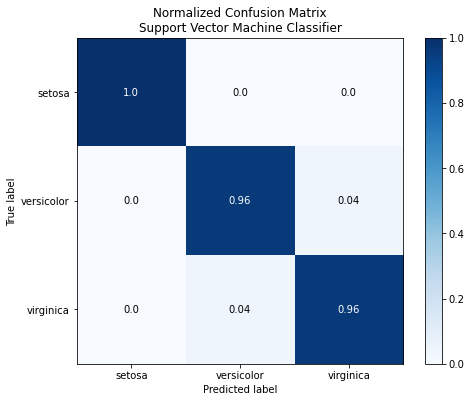

In [9]:
skplt.metrics.plot_confusion_matrix(Y, Y_predictSVM, normalize=True, figsize=(8,6), title= 'Normalized Confusion Matrix\nSupport Vector Machine Classifier')
plt.show()

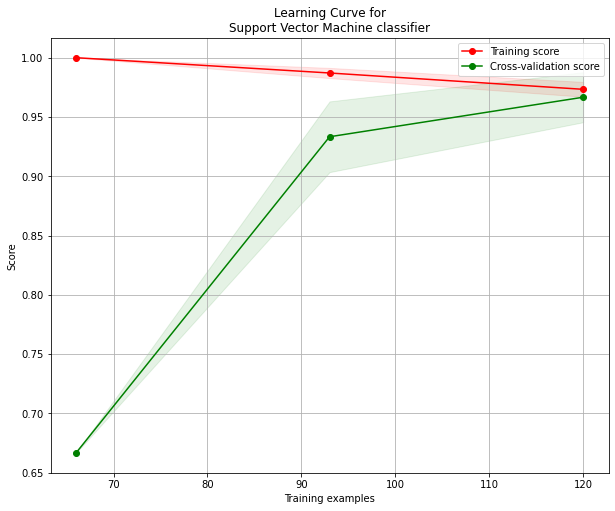

In [10]:
skplt.estimators.plot_learning_curve(classifier, X, Y, figsize=(10,8), title= 'Learning Curve for\nSupport Vector Machine classifier')
plt.show()

In [11]:
## Linear Discriminant Analysis classification

scaler = StandardScaler()
scaler.fit(X)

X = scaler.transform(X)

classifier = LinearDiscriminantAnalysis()
classifier.fit(X, Y) 

# Predict y data with classifier: 
Y_predictLDA = classifier.predict(X)

# Print results: 
print(classification_report(Y, Y_predictLDA)) 

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       0.98      0.96      0.97        50
   virginica       0.96      0.98      0.97        50

    accuracy                           0.98       150
   macro avg       0.98      0.98      0.98       150
weighted avg       0.98      0.98      0.98       150



The Linear Discriminant Analysis (LDA) classifier is 98% accurate

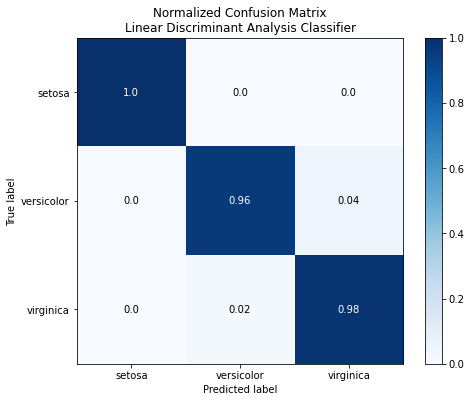

In [12]:
skplt.metrics.plot_confusion_matrix(Y, Y_predictLDA, normalize=True, figsize=(8,6), title= 'Normalized Confusion Matrix\nLinear Discriminant Analysis Classifier')
plt.show()

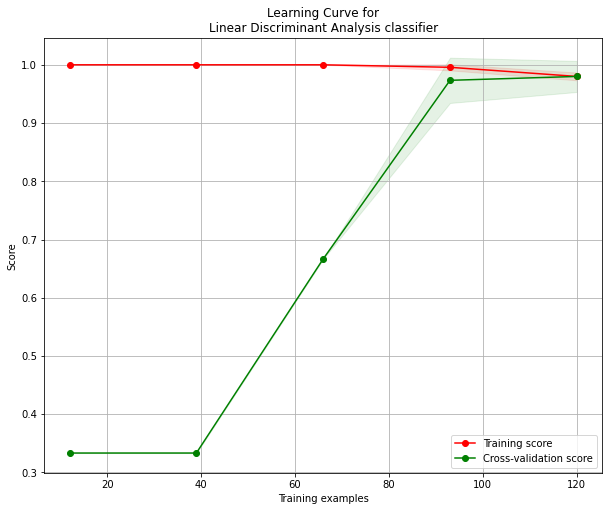

In [13]:
skplt.estimators.plot_learning_curve(classifier, X, Y, figsize=(10,8), title= 'Learning Curve for\nLinear Discriminant Analysis classifier')
plt.show()

In [14]:
## Naive Bayes classification

scaler = StandardScaler()
scaler.fit(X)

X = scaler.transform(X)

classifier = GaussianNB()
classifier.fit(X, Y) 

# Predict y data with classifier: 
Y_predictNB = classifier.predict(X)

# Print results: 
print(classification_report(Y, Y_predictNB)) 

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       0.94      0.94      0.94        50
   virginica       0.94      0.94      0.94        50

    accuracy                           0.96       150
   macro avg       0.96      0.96      0.96       150
weighted avg       0.96      0.96      0.96       150



Average accuracy of the Naive Bayes classifier is 96%

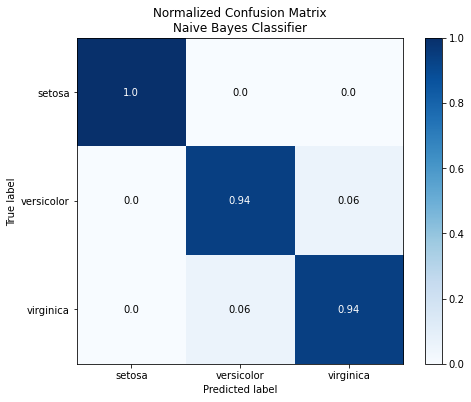

In [15]:
skplt.metrics.plot_confusion_matrix(Y, Y_predictNB, normalize=True, figsize=(8,6), title= 'Normalized Confusion Matrix\nNaive Bayes Classifier')
plt.show()

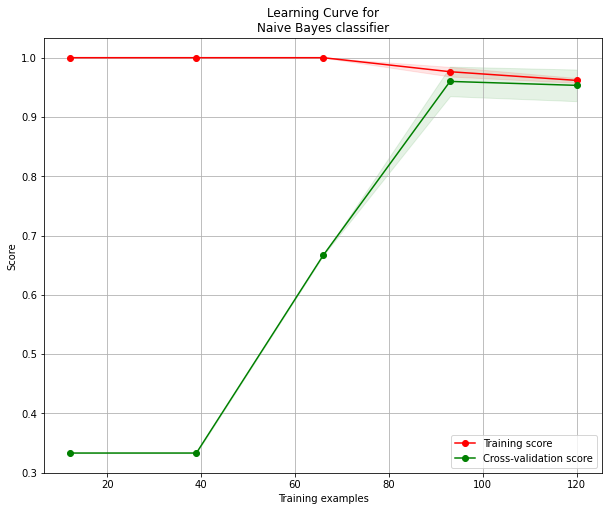

In [74]:
skplt.estimators.plot_learning_curve(classifier, X, Y, figsize=(10,8), title= 'Learning Curve for\nNaive Bayes classifier')
plt.show()

### Conclusion

Four classifiers were ran in this notebook: K Nearest Neighbor, Support Vector Machine, Linear Discriminant Analysis, and Naive Bayes. <br>
Two main interesting findings: <br>
1) The average accuracy is very comparable between all 4, between 95-98%. <br>
The lowest being the K Nearest Neighbor classifier at 95%, <br>
and the highest is the Linear Discriminant Analysis classifier at 98%. <br>
<br>
2) All the classifier only confused the Versicolor and the Virginica Irises, whenever there was a discrepancy between the true label and the predicted label. <br>
Also all the classifiers predicted the Setosa Irises correctly 100% of the time. <br>
